In [ ]:
import pandas as pd
import requests
from io import StringIO

# Step 1: Download the latest NAVAll.txt from AMFI
nav_url = 'https://www.amfiindia.com/spages/NAVAll.txt'
response = requests.get(nav_url)
nav_txt = response.text

# Step 2: Find the header line (contains 'Scheme Code')
lines = nav_txt.splitlines()
header_idx = None
for i, line in enumerate(lines):
    if 'Scheme Code' in line:
        header_idx = i
        break

# Step 3: Extract header and data lines
header = lines[header_idx]
data_lines = lines[header_idx+1:]
nav_data = '\n'.join([header] + data_lines)

# Step 4: Parse the data into a DataFrame
nav_df = pd.read_csv(StringIO(nav_data), sep=';', engine='python', on_bad_lines='skip')

# Step 5: Clean up (remove any rows with missing or invalid Scheme Code)
nav_df = nav_df[nav_df['Scheme Code'].str.isnumeric()]

# Step 6: Convert NAV and Date columns to appropriate types
nav_df['Net Asset Value'] = pd.to_numeric(nav_df['Net Asset Value'], errors='coerce')
nav_df['Date'] = pd.to_datetime(nav_df['Date'], format='%d-%b-%Y', errors='coerce')

# Preview the DataFrame
print(nav_df.head())


  Scheme Code ISIN Div Payout/ ISIN Growth ISIN Div Reinvestment  \
2      119551                 INF209KA12Z1          INF209KA13Z9   
3      119552                 INF209K01YM2                     -   
4      119553                 INF209K01YO8                     -   
5      108272                 INF209K01LX6          INF209KA11Z3   
6      110282                 INF209K01LU2                     -   

                                         Scheme Name  Net Asset Value  \
2  Aditya Birla Sun Life Banking & PSU Debt Fund ...         107.8466   
3  Aditya Birla Sun Life Banking & PSU Debt Fund ...         117.8464   
4  Aditya Birla Sun Life Banking & PSU Debt Fund ...         105.0100   
5  Aditya Birla Sun Life Banking & PSU Debt Fund ...         151.4886   
6  Aditya Birla Sun Life Banking & PSU Debt Fund ...         113.6424   

        Date  
2 2025-07-04  
3 2025-07-04  
4 2025-07-04  
5 2025-07-04  
6 2025-07-04  


In [ ]:
nav_df.to_csv('Mutual_Funds_Scheme.csv')


In [ ]:
import pandas as pd
df = pd.read_csv('Mutual_Funds_Scheme.csv')
display(df.head())

,Unnamed: 0,Scheme Code,ISIN Div Payout/ ISIN Growth,ISIN Div Reinvestment,Scheme Name,Net Asset Value,Date
0,2,119551,INF209KA12Z1,INF209KA13Z9,Aditya Birla Sun Life Banking & PSU Debt Fund ...,107.8466,2025-07-04
1,3,119552,INF209K01YM2,-,Aditya Birla Sun Life Banking & PSU Debt Fund ...,117.8464,2025-07-04
2,4,119553,INF209K01YO8,-,Aditya Birla Sun Life Banking & PSU Debt Fund ...,105.0100,2025-07-04
3,5,108272,INF209K01LX6,INF209KA11Z3,Aditya Birla Sun Life Banking & PSU Debt Fund ...,151.4886,2025-07-04
4,6,110282,INF209K01LU2,-,Aditya Birla Sun Life Banking & PSU Debt Fund ...,113.6424,2025-07-04


In [ ]:
df.shape

(14131, 7)

In [ ]:
df['Scheme Name'].unique()

array(['Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW',
       'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - MONTHLY IDCW',
       'Aditya Birla Sun Life Banking & PSU Debt Fund  - Direct - Quarterly IDCW',
       ..., 'UTI Quarterly Interval Fund - III -Direct Plan - IDCW',
       'UTI Quarterly Interval Fund - III -Regular Plan - Growth Option',
       'UTI Quarterly Interval Fund - III -Regular Plan - IDCW'],
      dtype=object)

In [ ]:
df['Scheme Name'].isna().sum()

np.int64(0)

In [ ]:
# Download the Scheme Master file from AMFI
scheme_master_url = 'https://portal.amfiindia.com/DownloadSchemeData_Po.aspx?mf=0'
scheme_master_response = requests.get(scheme_master_url)

# Try to read as CSV (if the response is CSV)
try:
    scheme_master_df = pd.read_csv(StringIO(scheme_master_response.text))
except Exception:
    from io import BytesIO
    scheme_master_df = pd.read_excel(BytesIO(scheme_master_response.content))

# Inspect and clean columns if needed
scheme_master_df.rename(columns={scheme_master_df.columns[1]: 'Code'}, inplace=True)
scheme_master_df['Code'] = scheme_master_df['Code'].astype(str)
nav_df['Scheme Code'] = nav_df['Scheme Code'].astype(str)


In [ ]:
# Merge on 'Scheme Code' from NAV and 'Code' from Scheme Master
merged_df = pd.merge(
    nav_df,
    scheme_master_df,
    left_on='Scheme Code',
    right_on='Code',
    how='left',
    suffixes=('', '_master')
)

# Preview merged data
print(merged_df[['Scheme Code', 'Scheme Name', 'Net Asset Value', 'Date', 'Scheme Category']].head())


  Scheme Code                                        Scheme Name  \
0      119551  Aditya Birla Sun Life Banking & PSU Debt Fund ...   
1      119552  Aditya Birla Sun Life Banking & PSU Debt Fund ...   
2      119553  Aditya Birla Sun Life Banking & PSU Debt Fund ...   
3      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ...   
4      110282  Aditya Birla Sun Life Banking & PSU Debt Fund ...   

   Net Asset Value       Date                     Scheme Category  
0         107.8466 2025-07-04  Debt Scheme - Banking and PSU Fund  
1         117.8464 2025-07-04  Debt Scheme - Banking and PSU Fund  
2         105.0100 2025-07-04  Debt Scheme - Banking and PSU Fund  
3         151.4886 2025-07-04  Debt Scheme - Banking and PSU Fund  
4         113.6424 2025-07-04  Debt Scheme - Banking and PSU Fund  


In [ ]:
merged_df.to_csv('MutualFunds_Final.csv')

In [ ]:
merged_df['Scheme Code'].unique()
merged_df['Scheme Code'].isna().sum()

np.int64(0)

In [ ]:
merged_df.shape

(14131, 16)

In [ ]:
##import schedule
#import time
#import subprocess

#def job():
#    subprocess.run(['python', 'update_nav_data.py'])

#schedule.every().day.at("02:00").do(job)

#while True:
 #   schedule.run_pending()
  #  time.sleep(60)

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Example scheme codes (replace with your full list)
scheme_codes = []
no_inputs=int(input('enter the number of codes'))
for i in range(no_inputs):
    code=input('enter the code')
    scheme_codes.append(code)

# Set date range for 5 years
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

all_nav_data = []

for code in scheme_codes:
    url = f"https://api.mfapi.in/mf/{code}"
    try:
        resp = requests.get(url)
        data = resp.json()
        if 'data' in data:
            for entry in data['data']:
                nav_date = datetime.strptime(entry['date'], '%d-%m-%Y')
                if start_date <= nav_date <= end_date:
                    all_nav_data.append({
                        'scheme_code': code,
                        'scheme_name': data.get('meta', {}).get('scheme_name', ''),
                        'date': nav_date,
                        'nav': float(entry['nav'].replace(',', '')) if entry['nav'] else None
                    })
    except Exception as e:
        print(f"Error fetching for scheme {code}: {e}")

nav_df = pd.DataFrame(all_nav_data)
print(nav_df.head())

enter the number of codes2
enter the code108272
enter the code119551
  scheme_code                                        scheme_name       date  \
0      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ... 2025-07-04   
1      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ... 2025-07-03   
2      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ... 2025-07-02   
3      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ... 2025-07-01   
4      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ... 2025-06-30   

        nav  
0  151.4886  
1  151.5020  
2  151.3805  
3  151.2341  
4  151.1150  


In [ ]:
nav_df['scheme_code'].unique()

array(['108272', '119551'], dtype=object)

In [ ]:
nav_df['date'].unique()

<DatetimeArray>
['2025-07-04 00:00:00', '2025-07-03 00:00:00', '2025-07-02 00:00:00',
 '2025-07-01 00:00:00', '2025-06-30 00:00:00', '2025-06-27 00:00:00',
 '2025-06-26 00:00:00', '2025-06-25 00:00:00', '2025-06-24 00:00:00',
 '2025-06-23 00:00:00',
 ...
 '2020-07-21 00:00:00', '2020-07-20 00:00:00', '2020-07-17 00:00:00',
 '2020-07-16 00:00:00', '2020-07-15 00:00:00', '2020-07-14 00:00:00',
 '2020-07-13 00:00:00', '2020-07-10 00:00:00', '2020-07-09 00:00:00',
 '2020-07-08 00:00:00']
Length: 1213, dtype: datetime64[ns]

In [ ]:
import numpy as np

def calculate_cagr(df, years):
    df_sorted = df.sort_values('date')
    nav_start = df_sorted.iloc[0]['nav']
    nav_end = df_sorted.iloc[-1]['nav']
    n = years
    if nav_start > 0 and nav_end > 0:
        cagr = (nav_end / nav_start) ** (1/n) - 1
        return round(cagr * 100, 2)  # as percentage
    else:
        return np.nan

results = []
for code, group in nav_df.groupby('scheme_code'):
    scheme_name = group['scheme_name'].iloc[0]
    # 1 year
    one_year_ago = nav_df['date'].max() - pd.Timedelta(days=365)
    df_1y = group[group['date'] >= one_year_ago]
    cagr_1y = calculate_cagr(df_1y, 1) if len(df_1y) > 1 else np.nan
    # 3 years
    three_years_ago = nav_df['date'].max() - pd.Timedelta(days=3*365)
    df_3y = group[group['date'] >= three_years_ago]
    cagr_3y = calculate_cagr(df_3y, 3) if len(df_3y) > 1 else np.nan
    # 5 years
    five_years_ago = nav_df['date'].max() - pd.Timedelta(days=5*365)
    df_5y = group[group['date'] >= five_years_ago]
    cagr_5y = calculate_cagr(df_5y, 5) if len(df_5y) > 1 else np.nan
    results.append({
        'scheme_code': code,
        'scheme_name': scheme_name,
        'CAGR_1Y_%': cagr_1y,
        'CAGR_3Y_%': cagr_3y,
        'CAGR_5Y_%': cagr_5y
    })

cagr_df = pd.DataFrame(results)
print(cagr_df)


  scheme_code                                        scheme_name  CAGR_1Y_%  \
0      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ...       2.61   
1      119551  Aditya Birla Sun Life Banking & PSU Debt Fund ...       2.96   

   CAGR_3Y_%  CAGR_5Y_%  
0      -1.50      -1.41  
1       0.72      -7.06  


In [ ]:
risk_free_rate = 0.05  # 5% annual risk-free rate

risk_results = []
for code, group in nav_df.groupby('scheme_code'):
    scheme_name = group['scheme_name'].iloc[0]
    group_sorted = group.sort_values('date')
    returns = group_sorted['nav'].pct_change().dropna()
    if len(returns) > 1:
        std_annual = returns.std() * np.sqrt(252) * 100  # as percentage
        mean_return = returns.mean() * 252  # annualized
        sharpe = (mean_return - risk_free_rate) / (returns.std() * np.sqrt(252)) if returns.std() > 0 else np.nan
    else:
        std_annual = np.nan
        sharpe = np.nan
    risk_results.append({
        'scheme_code': code,
        'scheme_name': scheme_name,
        'Std_Dev_Annual_%': round(std_annual, 2) if not np.isnan(std_annual) else np.nan,
        'Sharpe_Ratio': round(sharpe, 2) if not np.isnan(sharpe) else np.nan
    })

risk_df = pd.DataFrame(risk_results)
print(risk_df)

  scheme_code                                        scheme_name  \
0      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ...   
1      119551  Aditya Birla Sun Life Banking & PSU Debt Fund ...   

   Std_Dev_Annual_%  Sharpe_Ratio  
0              6.73         -0.93  
1             12.75         -0.92  


In [ ]:
import pandas as pd
import numpy as np

# Assume cagr_df and risk_df are already created as in previous steps
# Merge the two DataFrames on scheme_code and scheme_name
merged = pd.merge(cagr_df, risk_df, on=['scheme_code', 'scheme_name'])

def cagr_band(cagr):
    if pd.isna(cagr):
        return "Insufficient Data"
    if cagr >= 12:
        return "Excellent"
    elif cagr >= 8:
        return "Good"
    elif cagr >= 5:
        return "Average"
    else:
        return "Poor"

def compute_score(row):
    # Example: 3Y CAGR (30%), 5Y CAGR (30%), 1Y CAGR (10%), Sharpe (20%), Risk (10%, negative)
    score = (
        0.3 * (row['CAGR_3Y_%'] if not np.isnan(row['CAGR_3Y_%']) else 0) +
        0.3 * (row['CAGR_5Y_%'] if not np.isnan(row['CAGR_5Y_%']) else 0) +
        0.1 * (row['CAGR_1Y_%'] if not np.isnan(row['CAGR_1Y_%']) else 0) +
        0.2 * (row['Sharpe_Ratio'] if not np.isnan(row['Sharpe_Ratio']) else 0) -
        0.1 * (row['Std_Dev_Annual_%'] if not np.isnan(row['Std_Dev_Annual_%']) else 0)
    )
    return round(score, 2)

def advisability(row):
    if row['Score'] >= 7 and row['CAGR_Band'] in ['Good', 'Excellent']:
        return "Advisable"
    elif row['Score'] >= 5 or row['CAGR_Band'] == 'Average':
        return "Cautious"
    else:
        return "Not Advisable"

# Apply categorization and scoring
merged['CAGR_Band'] = merged['CAGR_3Y_%'].apply(cagr_band)
merged['Score'] = merged.apply(compute_score, axis=1)
merged['Advisability'] = merged.apply(advisability, axis=1)

# Select and display relevant columns
result = merged[['scheme_code', 'scheme_name', 'CAGR_1Y_%', 'CAGR_3Y_%', 'CAGR_5Y_%',
                 'Std_Dev_Annual_%', 'Sharpe_Ratio', 'CAGR_Band', 'Score', 'Advisability']]
print(result)


  scheme_code                                        scheme_name  CAGR_1Y_%  \
0      108272  Aditya Birla Sun Life Banking & PSU Debt Fund ...       2.61   
1      119551  Aditya Birla Sun Life Banking & PSU Debt Fund ...       2.96   

   CAGR_3Y_%  CAGR_5Y_%  Std_Dev_Annual_%  Sharpe_Ratio CAGR_Band  Score  \
0      -1.50      -1.41              6.73         -0.93      Poor  -1.47   
1       0.72      -7.06             12.75         -0.92      Poor  -3.06   

    Advisability  
0  Not Advisable  
1  Not Advisable  


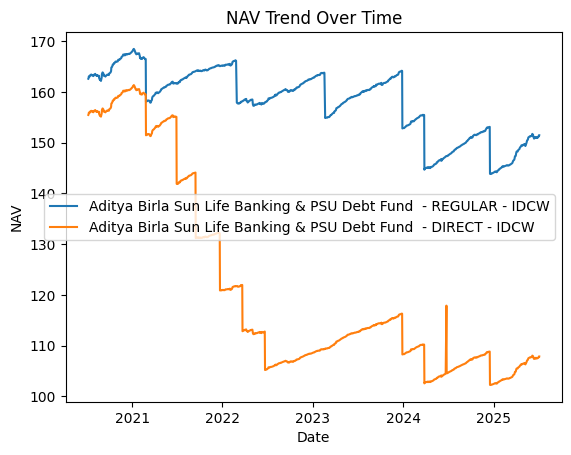

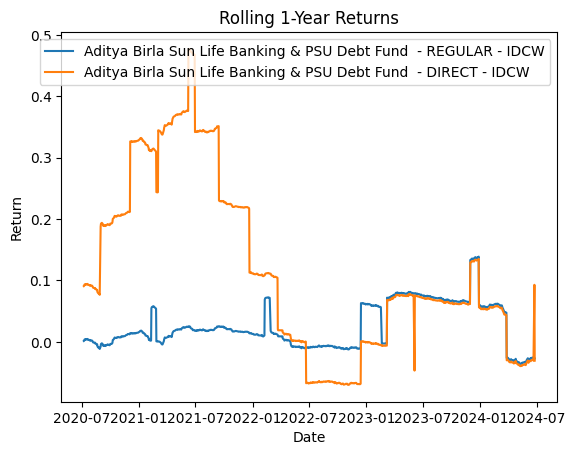

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load NAV data (assume nav_df with columns: 'date', 'nav', 'scheme_name')
nav_df['date'] = pd.to_datetime(nav_df['date'])
funds = nav_df['scheme_name'].unique()

# NAV Trend
for fund in funds:
    plt.plot(nav_df[nav_df['scheme_name'] == fund]['date'], nav_df[nav_df['scheme_name'] == fund]['nav'], label=fund)
plt.title('NAV Trend Over Time')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.legend()
plt.show()

# Rolling Returns (example: 1-year)
nav_df['nav_return'] = nav_df.groupby('scheme_name')['nav'].pct_change(periods=252)
for fund in funds:
    plt.plot(nav_df[nav_df['scheme_name'] == fund]['date'], nav_df[nav_df['scheme_name'] == fund]['nav_return'], label=fund)
plt.title('Rolling 1-Year Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

/tmp/ipython-input-29-2790063127.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


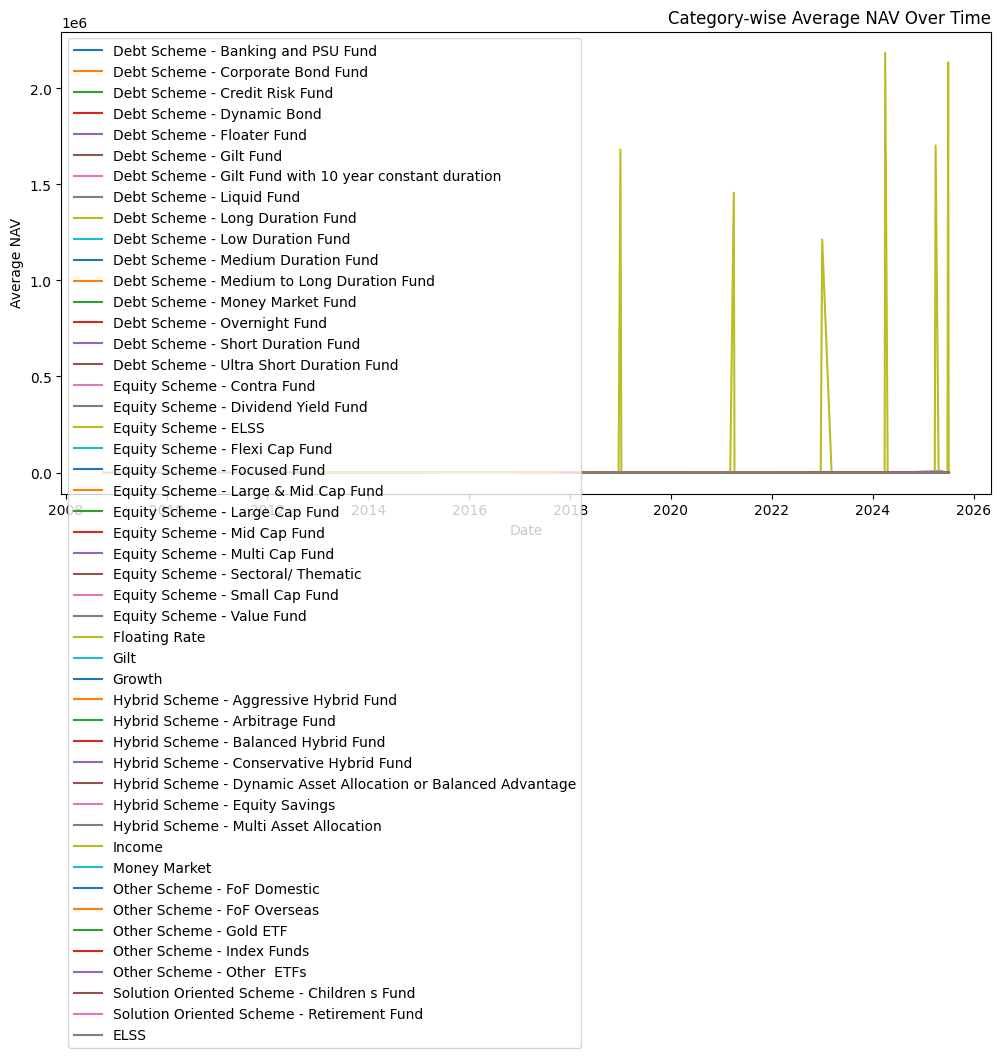

In [ ]:
#category comparison(multi line bar chart)
import pandas as pd
import matplotlib.pyplot as plt

# Assume merged_df has columns: 'Date', 'Net Asset Value', 'Scheme Name', 'Scheme Category'
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
categories = merged_df['Scheme Category'].unique()

plt.figure(figsize=(12, 6))
for cat in categories:
    cat_df = merged_df[merged_df['Scheme Category'] == cat]
    # Calculate mean NAV per date for the category
    mean_nav = cat_df.groupby('Date')['Net Asset Value'].mean()
    plt.plot(mean_nav.index, mean_nav.values, label=cat)
#shift the title to the right most area
plt.title('Category-wise Average NAV Over Time',loc='right')
plt.xlabel('Date')
plt.ylabel('Average NAV')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-773388423.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


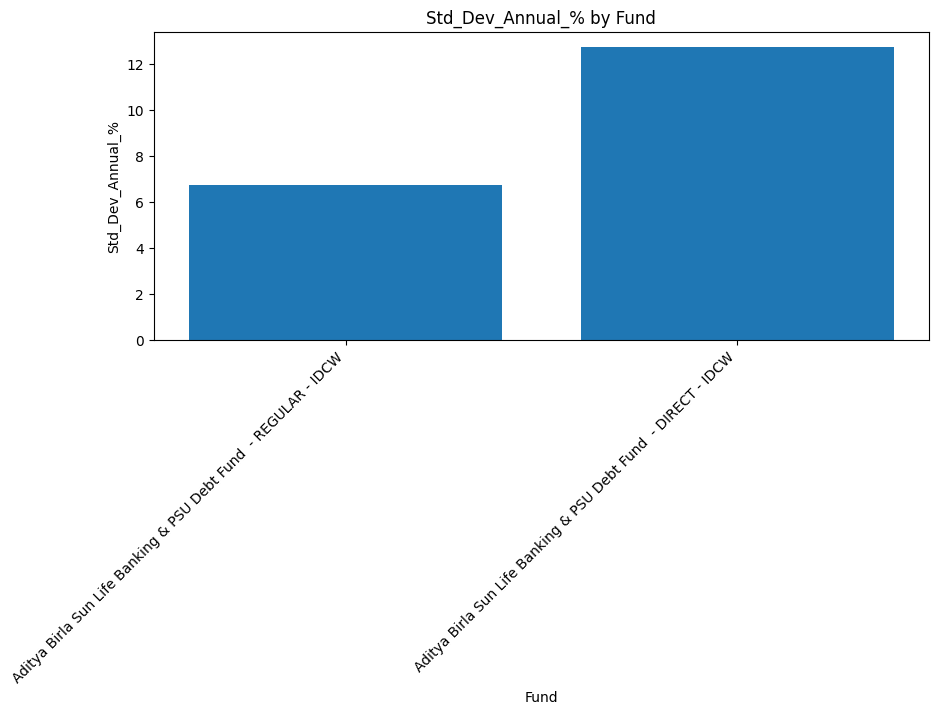

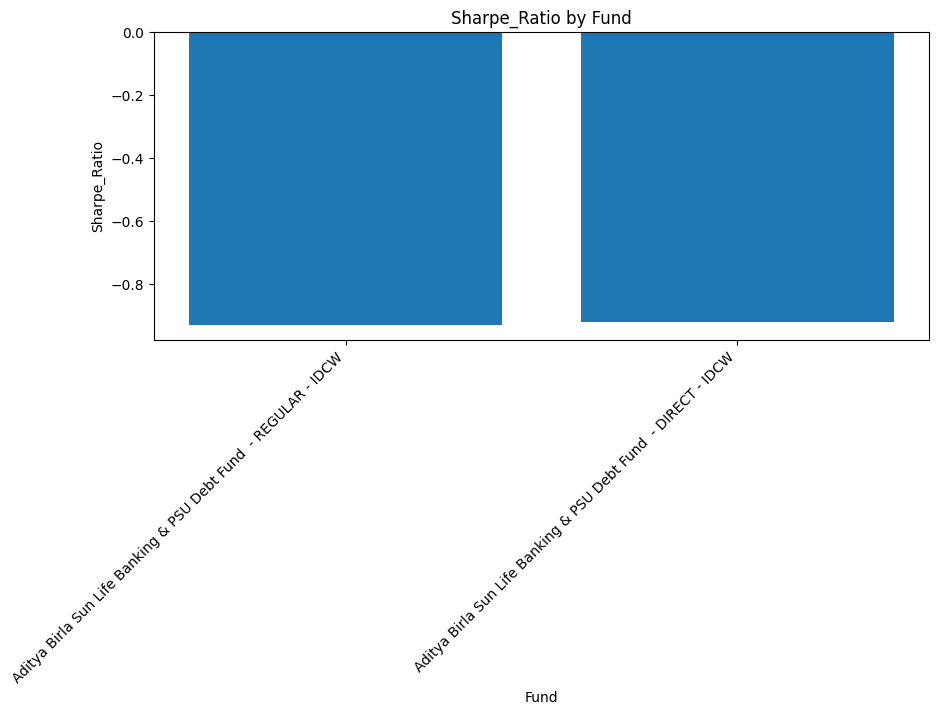

In [ ]:
#risk metric visualization
import numpy as np

# Assume risk_df has columns: 'scheme_name', 'Std_Dev_Annual_%', 'Sharpe_Ratio', 'Beta'
metrics = ['Std_Dev_Annual_%', 'Sharpe_Ratio']
funds = risk_df['scheme_name']

# Bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(10, 4))
    plt.bar(funds, risk_df[metric])
    plt.title(f'{metric} by Fund')
    plt.xlabel('Fund')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

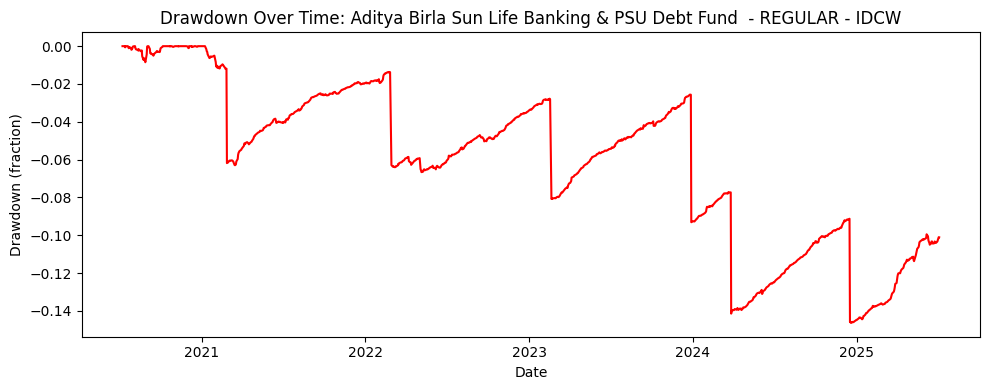

In [ ]:
#visulaize the maximum loss through peak and trough
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume nav_df has columns: 'date', 'nav', 'scheme_name'
# Using nav_df which contains historical NAV data fetched from the API
fund = nav_df['scheme_name'].unique()[0]  # Example: first fund
fund_df = nav_df[nav_df['scheme_name'] == fund].sort_values('date')
nav = fund_df['nav'].values
drawdown = (nav - np.maximum.accumulate(nav)) / np.maximum.accumulate(nav)

plt.figure(figsize=(10, 4))
plt.plot(fund_df['date'], drawdown, color='red')
plt.title(f'Drawdown Over Time: {fund}')
plt.xlabel('Date')
plt.ylabel('Drawdown (fraction)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-37-3134846607.py:17: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_nav['return'] = monthly_nav.groupby('scheme_name')['nav'].pct_change()


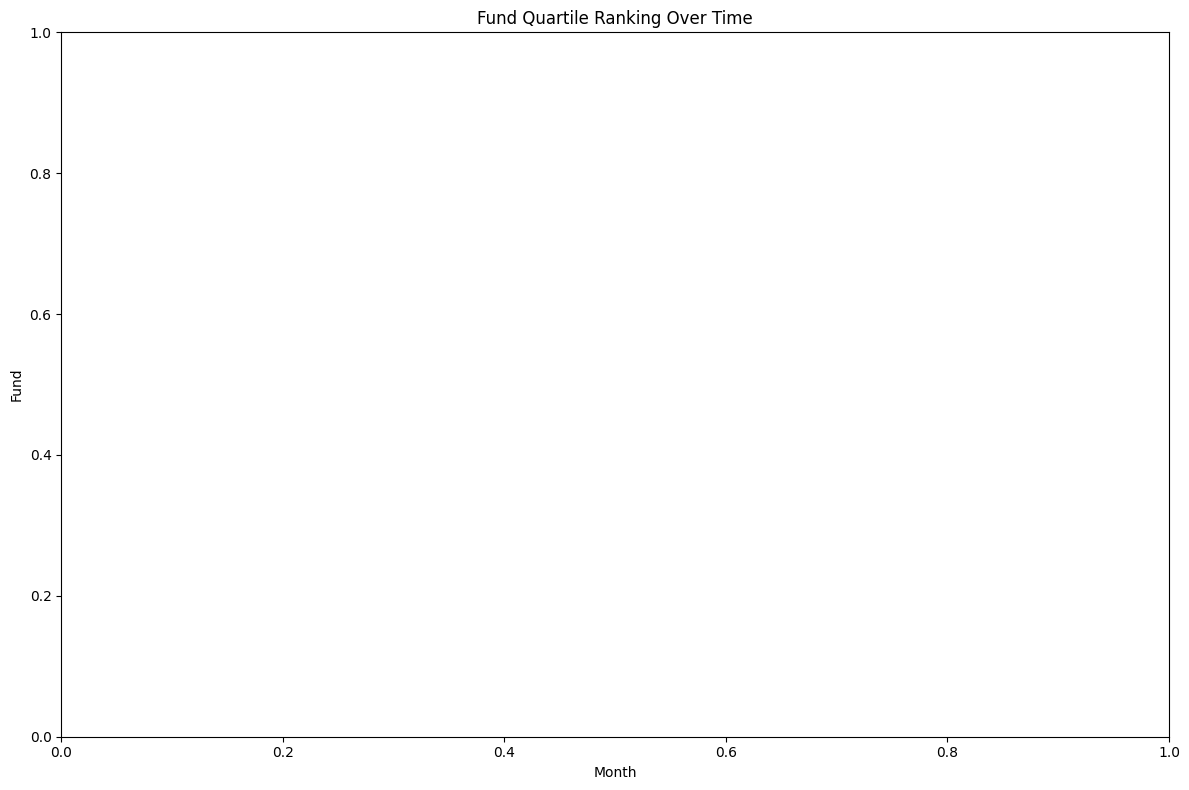

In [ ]:
#consistency and quartile ranking(only will work if the entry is atleast of 4 schemes under the same category)
#import seaborn as sns

# Assume merged_df has columns: 'Date', 'Net Asset Value', 'Scheme Name', 'Scheme Category'
# Calculate monthly returns for each fund
# Rename columns for easier use
#df_ranking = merged_df.rename(columns={
 #   'Date': 'date',
  #  'Net Asset Value': 'nav',
   # 'Scheme Name': 'scheme_name',
    #'Scheme Category': 'category'
#})

#df_ranking['date'] = pd.to_datetime(df_ranking['date'])
#df_ranking['month'] = df_ranking['date'].dt.to_period('M')
#monthly_nav = df_ranking.groupby(['scheme_name', 'month'])['nav'].last().reset_index()
#monthly_nav['return'] = monthly_nav.groupby('scheme_name')['nav'].pct_change()

# For each month and category, rank funds by return
# Merge with category information
#monthly_nav = monthly_nav.merge(df_ranking[['scheme_name', 'category']].drop_duplicates(), on='scheme_name')

# Drop rows with NaN returns before ranking
#monthly_nav.dropna(subset=['return', 'category'], inplace=True)

# Ensure there are at least 4 funds in a category for ranking
#def safe_qcut(x):
 #   if len(x) >= 4:
  #      return pd.qcut(x.rank(method='first'), 4, labels=False) + 1
   # else:
    #    return pd.Series(np.nan, index=x.index) # Return NaN for all in this group

#monthly_nav['quartile'] = monthly_nav.groupby(['month', 'category'])['return'].transform(safe_qcut)

# Drop rows with NaN quartiles (categories with less than 4 funds in a month)
#monthly_nav.dropna(subset=['quartile'], inplace=True)

# Pivot to create a heatmap of quartile positions
#heatmap_data = monthly_nav.pivot_table(index='scheme_name', columns='month', values='quartile')

#plt.figure(figsize=(12, 8)) # Increased figure size for better readability
#sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Quartile (1=Top, 4=Bottom)'}, linewidths=0.5)
#plt.title('Fund Quartile Ranking Over Time')
#plt.xlabel('Month')
#plt.ylabel('Fund')
#plt.tight_layout()
#plt.show()